In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.misc import derivative

In [3]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [4]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

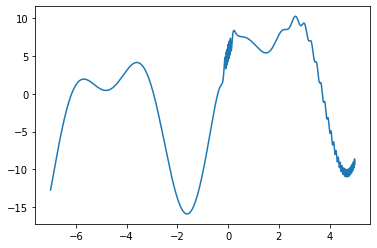

In [5]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

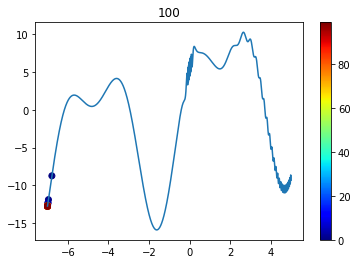

In [8]:
import matplotlib.cm as cm
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



### Example

interval = \[2,5\]

Function f(x) = x


In [49]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [12]:
area_under_the_curve = result[0]
area_under_the_curve

10.5

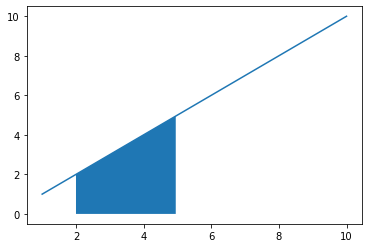

In [13]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

In [74]:
# x1 = 5*np.linspace(1, 5, 100)
# a = len(x1)
#np.ones(x1).astype(int)
# a = len(x1)
# x1 * 5

100

In [76]:
#f(x) = 5
from scipy import integrate
a1, b1 = [2, 5]
def f1(x1):
    return 5

result1 = integrate.quad(f1, a1, b1)
result1

(15.0, 1.6653345369377348e-13)

In [34]:
area_under_the_curve1 = result1[0]
area_under_the_curve1

15.0

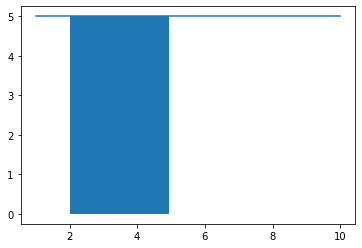

In [143]:
x1 = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x1, 5 * np.ones(len(x1)))
plt.fill_between(section,f1(section))

2. interval = \[-1,1\]

Function f(x) = 1/x

In [87]:
from scipy import integrate
a2, b2 = [-1, 0]
c, d = [0, 1]
def f2(x):
    return 1/x

result2_1 = integrate.quad(f2, a, b)
result2_2 = integrate.quad(f2, c,d)
result2 = result2_1 + result2_2
result2

<ipython-input-87-df29437c7ec1>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result2_1 = integrate.quad(f2, a, b)
<ipython-input-87-df29437c7ec1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose inte

(-41.67684067538809, 9.35056037314051, 41.67684067538809, 9.35056037314051)

In [90]:
area_under_the_curve2 = np.abs(result2_1[0]) + np.abs(result2_2[0])
area_under_the_curve2

83.35368135077618

<ipython-input-87-df29437c7ec1>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


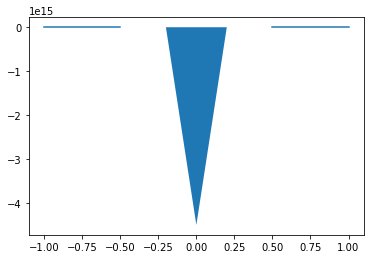

In [124]:
x2 = np.linspace(-1,1, 5)
section2 = np.arange(-1, 1, 1/5)
#section2_1 = np.arange(0, 1, 1/5)
plt.plot(x2, f2(x2))
plt.fill_between(section2,f2(section2))
#plt.fill_between(section2_1,f2(section2_1))

2. interval = \[-pi,pi\]

Function f(x) = sin(x)

In [120]:

from scipy import integrate
a, b = [-np.pi, np.pi]
def f(x):
    return np.sin(x)

result = integrate.quad(f, a, b)
result

(0.0, 4.3998892617846e-14)

In [121]:
area_under_the_curve = result[0]
area_under_the_curve

0.0

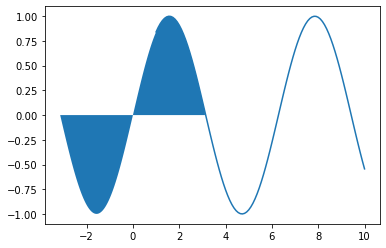

In [125]:
x = np.linspace(1,10, 100)
section = np.arange(-np.pi, np.pi, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


In [126]:
from scipy import integrate
a, b = [-np.pi, np.pi]
def f(x):
    return np.cos(x)

result = integrate.quad(f, a, b)
result

(2.615901373506474e-16, 4.471737093238828e-14)

In [127]:
area_under_the_curve = result[0]
area_under_the_curve

2.615901373506474e-16

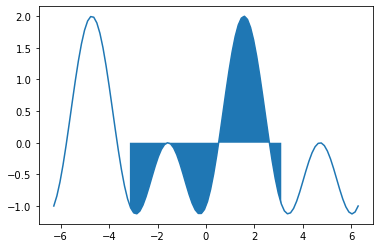

In [134]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
section = np.arange(-np.pi, np.pi, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

In [136]:
from scipy import integrate
a, b = [-np.pi, np.pi]
def f5(x):
    return np.sin(x) - np.cos(2*x)

result = integrate.quad(f5, a, b)
result

(5.231802747012948e-16, 4.085699506880975e-09)

In [132]:
area_under_the_curve = result[0]
area_under_the_curve

5.231802747012948e-16

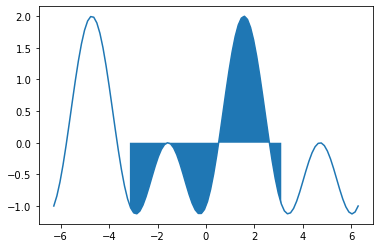

In [137]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
section = np.arange(-np.pi, np.pi, 1/20)
plt.plot(x, f5(x))
plt.fill_between(section,f(section))